# Regression

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/Shareddrives/컨디션난조,분위기고조/실습과제/5주차/

/content/gdrive/Shareddrives/컨디션난조,분위기고조/실습과제/5주차


In [3]:
%ls

 최종/                     movies_metadata.csv
'4_CBR(knn)_AR_CF.ipynb'   ratings_small.csv
 AR_CF_anime.csv          '[컨디션난조 분위기고조] week5_AR_CF_수진2.ipynb'
 books.csv                '[컨디션난조 분위기고조] week5_AR_CF.ipynb'
'bread basket.csv'        '[컨디션난조 분위기고조] week5_AR_CF_pre.ipynb'
 frequent_itemsets.csv    '[컨디션난조 분위기고조] week5_KNN_회귀.ipynb'


In [4]:
%cd 최종

/content/gdrive/Shareddrives/컨디션난조,분위기고조/실습과제/5주차/최종


In [5]:
import pandas as pd
dataset = pd.read_csv('[컨디션난조 분위기고조] week5_KNN_데이터.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
dataset.shape

(400, 9)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

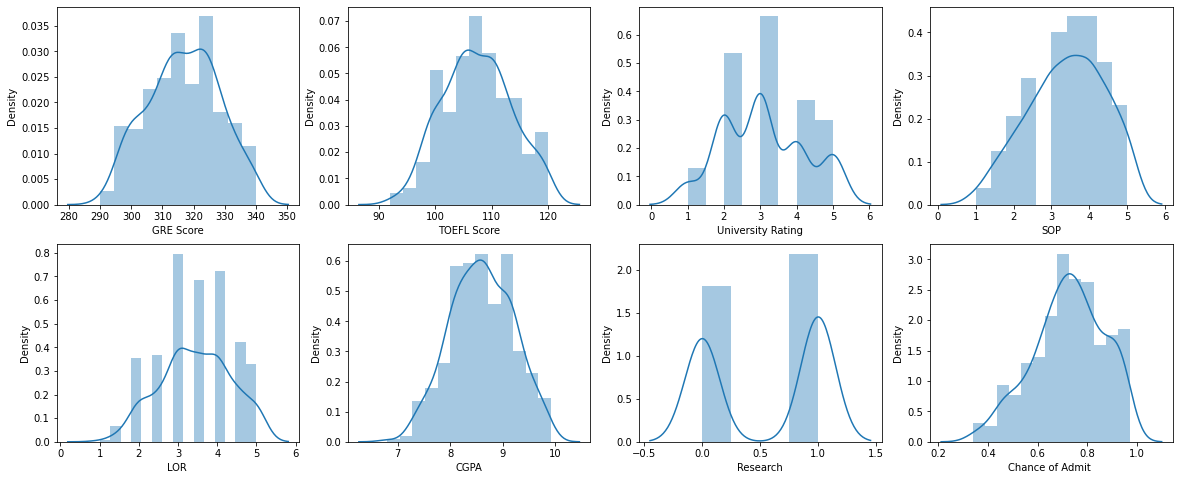

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(2, 4, figsize=(20, 8))

sns.distplot(dataset[dataset.columns[1]], ax=axes[0, 0])
sns.distplot(dataset[dataset.columns[2]], ax=axes[0, 1])
sns.distplot(dataset[dataset.columns[3]], ax=axes[0, 2])
sns.distplot(dataset[dataset.columns[4]], ax=axes[0, 3])
sns.distplot(dataset[dataset.columns[5]], ax=axes[1, 0])
sns.distplot(dataset[dataset.columns[6]], ax=axes[1, 1])
sns.distplot(dataset[dataset.columns[7]], ax=axes[1, 2])
sns.distplot(dataset[dataset.columns[8]], ax=axes[1, 3])

plt.show()

In [9]:
dataset.isnull().sum() #결측치확인

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
# Features와 target 나누기
x = dataset[dataset.columns[:-1]]
y = dataset[dataset.columns[-1]]

In [11]:
# Z-score Standardization
from sklearn.preprocessing import StandardScaler
scaled_x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns, index = x.index)

In [12]:
scaled_x.describe() # 표준화 이후, 독립변수(feature)의 기초통계량

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,6.383782e-17,-3.785861e-16,5.412337e-16,7.147061e-16,1.859624e-16,-3.019807e-16,8.076873e-16,2.942091e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-1.727726e+00,-2.339367e+00,-2.542098e+00,-1.827457e+00,-2.386613e+00,-2.733036e+00,-3.020504e+00,-1.099975e+00
25%,-8.638630e-01,-7.685900e-01,-7.274920e-01,-9.520286e-01,-8.949798e-01,-5.042604e-01,-7.201909e-01,-1.099975e+00
50%,0.000000e+00,1.679859e-02,-6.763531e-02,-7.660001e-02,9.944220e-02,5.293342e-02,1.859559e-02,9.091117e-01
75%,8.638630e-01,7.149218e-01,7.571856e-01,7.988286e-01,5.966532e-01,6.101273e-01,7.783704e-01,9.091117e-01
max,1.727726e+00,2.023903e+00,2.076899e+00,1.674257e+00,1.591075e+00,1.724515e+00,2.218165e+00,9.091117e-01


correlation, vif

In [13]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(scaled_x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,Serial No.,1.087496
1,GRE Score,4.617117
2,TOEFL Score,4.357634
3,University Rating,2.959083
4,SOP,3.113171
5,LOR,2.432982
6,CGPA,5.419519
7,Research,1.543329


In [14]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    scaled_x, y, test_size = 0.2, random_state = 2021)

In [15]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(320, 8)
(320,)
(80, 8)
(80,)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

### a) Original model

In [17]:
train_features.shape[1]

8

In [18]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=300, batch_size=50, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/300
6/6 [==============================] - 3s 46ms/step - loss: 0.3410 - mape: 66.2486 - val_loss: 0.1997 - val_mape: 47.3493 - lr: 0.0100
Epoch 2/300
6/6 [==============================] - 0s 9ms/step - loss: 0.1558 - mape: 43.6969 - val_loss: 0.0731 - val_mape: 30.7211 - lr: 0.0100
Epoch 3/300
6/6 [==============================] - 0s 9ms/step - loss: 0.0477 - mape: 25.4765 - val_loss: 0.0420 - val_mape: 23.9021 - lr: 0.0100
Epoch 4/300
6/6 [==============================] - 0s 12ms/step - loss: 0.0361 - mape: 22.7309 - val_loss: 0.0367 - val_mape: 22.6374 - lr: 0.0100
Epoch 5/300
6/6 [==============================] - 0s 9ms/step - loss: 0.0277 - mape: 19.8448 - val_loss: 0.0301 - val_mape: 19.3543 - lr: 0.0100
Epoch 6/300
6/6 [==============================] - 0s 9ms/step - loss: 0.0248 - mape: 18.5451 - val_loss: 0.0255 - val_mape: 17.6515 - lr: 0.0100
Epoch 7/300
6/6 [==============================] - 0s 9ms/step - loss: 0.0181 - mape: 16.2230 - val_loss: 0.0183 - val_map

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


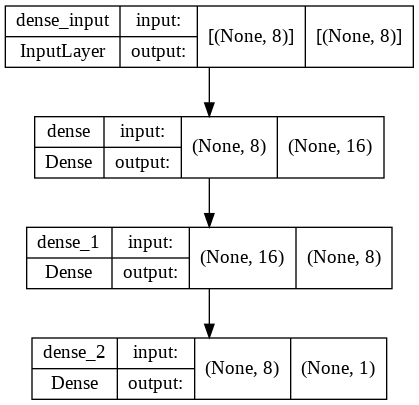

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [21]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.4433919 ,  0.29793507,  0.12810461,  0.43669683, -0.3668667 ,
          0.20300923, -0.34462556, -0.21947886,  0.06328273, -0.23163278,
         -0.2509723 ,  0.1760516 ,  0.08098345, -0.28021327,  0.27910954,
          0.02152175],
        [ 0.24577752, -0.39882362,  0.0310023 ,  0.47162682, -0.42702672,
         -0.15132955, -0.0186422 ,  0.55353945,  0.09773561, -0.15408906,
         -0.51326823,  0.09154633, -0.2175643 , -0.15412927,  0.1250966 ,
         -0.32850897],
        [-0.13720743, -0.00822562,  0.08692469, -0.06223456,  0.23096606,
          0.06291597, -0.11038452, -0.10800666, -0.20140885, -0.03814913,
         -0.07157785,  0.19665551,  0.24671075,  0.47786433,  0.01513884,
          0.2847819 ],
        [ 0.33452007, -0.00680675, -0.19969837,  0.22569174,  0.2230758 ,
         -0.51010543, -0.39672768, -0.40643218, -0.34266472,  0.17012495,
          0.26736557,  0.10577664, -0.15630648,  0.4399729 ,  0.02269905,
         -0.21195507],
        [-0.3354474 

In [22]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.443392,0.297935,0.128105,0.436697,-0.366867,0.203009,-0.344626,-0.219479,0.063283,-0.231633,-0.250972,0.176052,0.080983,-0.280213,0.279110,0.021522
1,0.245778,-0.398824,0.031002,0.471627,-0.427027,-0.151330,-0.018642,0.553539,0.097736,-0.154089,-0.513268,0.091546,-0.217564,-0.154129,0.125097,-0.328509
2,-0.137207,-0.008226,0.086925,-0.062235,0.230966,0.062916,-0.110385,-0.108007,-0.201409,-0.038149,-0.071578,0.196656,0.246711,0.477864,0.015139,0.284782
3,0.334520,-0.006807,-0.199698,0.225692,0.223076,-0.510105,-0.396728,-0.406432,-0.342665,0.170125,0.267366,0.105777,-0.156306,0.439973,0.022699,-0.211955
4,-0.335447,0.003769,0.076053,0.008689,0.047807,-0.046851,0.035523,-0.116884,0.318015,-0.022853,0.373434,-0.088988,-0.025336,0.182843,0.036684,0.248243
5,0.378822,0.233017,-0.252130,0.243415,-0.090224,0.032998,0.168623,-0.248092,-0.078192,0.365259,-0.327077,0.019103,-0.354183,0.331355,-0.309787,0.254669
6,-0.296744,0.164938,-0.201728,-0.276355,-0.070566,0.292764,-0.419245,0.031147,0.164374,-0.059997,0.122224,-0.142002,0.016016,-0.322173,0.467503,-0.148224
7,0.460327,-0.348065,-0.338852,-0.146224,-0.053525,0.149065,0.102882,-0.341974,0.613864,-0.065878,0.378718,0.416863,0.092212,0.146129,0.217786,-0.339323


In [23]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [24]:
reg_history.history

{'loss': [0.34100231528282166,
  0.15582989156246185,
  0.04766801372170448,
  0.03608134761452675,
  0.027686703950166702,
  0.024792727082967758,
  0.01814192160964012,
  0.017048459500074387,
  0.014588041231036186,
  0.013056950643658638,
  0.011318654753267765,
  0.010562420822679996,
  0.009361221455037594,
  0.008346984162926674,
  0.007869048975408077,
  0.007645302452147007,
  0.007040331605821848,
  0.006593645550310612,
  0.0062524909153580666,
  0.006003194954246283,
  0.005666651297360659,
  0.0054626064375042915,
  0.00544148962944746,
  0.004992782138288021,
  0.004863467067480087,
  0.004656996577978134,
  0.0047476585023105145,
  0.00460893614217639,
  0.004458952229470015,
  0.004178308881819248,
  0.004040312021970749,
  0.004105723462998867,
  0.00400352431461215,
  0.003924676217138767,
  0.003665253287181258,
  0.003540672827512026,
  0.003510397858917713,
  0.003480830229818821,
  0.003304841695353389,
  0.0031414944678545,
  0.003445998067036271,
  0.00325644435

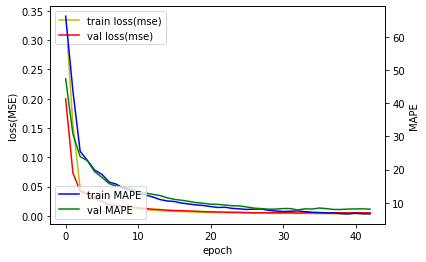

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

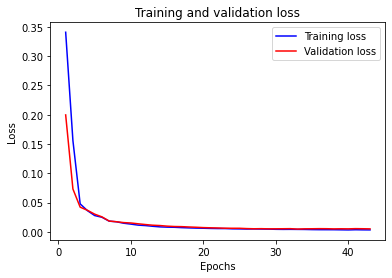

In [26]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

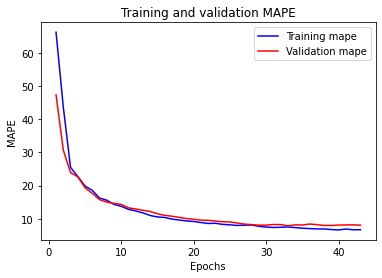

In [27]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [28]:
# 예측
y_pred = model.predict(test_features)

In [29]:
y_pred

array([[0.796585  ],
       [0.5458518 ],
       [0.6180672 ],
       [0.9806387 ],
       [0.8261105 ],
       [0.54535097],
       [0.73264474],
       [0.46410596],
       [0.9666914 ],
       [0.552837  ],
       [0.585354  ],
       [0.82507974],
       [0.7189308 ],
       [0.55067515],
       [0.651794  ],
       [0.7144174 ],
       [0.47387785],
       [0.5603224 ],
       [0.7816952 ],
       [0.6839985 ],
       [0.80902207],
       [0.65001243],
       [0.8458037 ],
       [0.5888173 ],
       [0.6389712 ],
       [0.5386461 ],
       [0.9935793 ],
       [0.7009254 ],
       [0.86188006],
       [0.71791166],
       [0.6081376 ],
       [0.79010016],
       [0.64147466],
       [0.9487375 ],
       [0.6207742 ],
       [0.7943737 ],
       [0.8561581 ],
       [0.5524251 ],
       [0.75852793],
       [0.87475914],
       [0.8322347 ],
       [0.5498603 ],
       [0.66499233],
       [0.5957274 ],
       [0.52059716],
       [0.58464795],
       [0.64450014],
       [0.847

In [30]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.483
test MSE: 0.009
tset MAPE: 0.108


### RQ1

#### b) Model 1

In [31]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(256, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min", restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode="min", min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

Epoch 1/200
6/6 [==============================] - 1s 39ms/step - loss: 0.7591 - mape: 91.8020 - val_loss: 0.3675 - val_mape: 82.4614 - lr: 0.0100
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 0.2872 - mape: 74.1965 - val_loss: 0.1556 - val_mape: 49.5551 - lr: 0.0100
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1241 - mape: 39.6988 - val_loss: 0.0485 - val_mape: 26.1136 - lr: 0.0100
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0687 - mape: 32.8847 - val_loss: 0.0374 - val_mape: 22.2522 - lr: 0.0100
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0273 - mape: 20.0360 - val_loss: 0.0294 - val_mape: 17.9036 - lr: 0.0100
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0244 - mape: 17.9639 - val_loss: 0.0189 - val_mape: 15.8811 - lr: 0.0100
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0156 - mape: 14.9088 - val_loss: 0.0157 - val_ma

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               2304      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
_________________________________________________________________


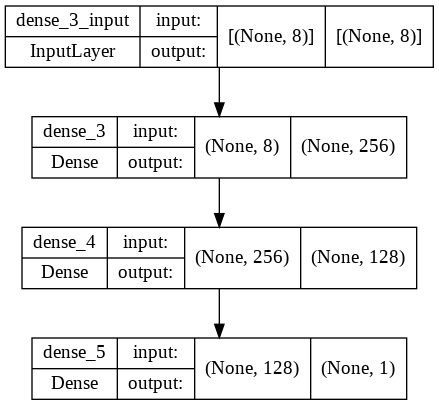

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [34]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.03538578,  0.06546279, -0.01897915, ..., -0.0106923 ,
          0.015324  ,  0.04470189],
        [-0.14005901, -0.07825659,  0.06900888, ...,  0.08625634,
          0.03115262,  0.10470447],
        [-0.061696  ,  0.00054897, -0.07020787, ..., -0.06535389,
         -0.11338499, -0.0225454 ],
        ...,
        [-0.17353205, -0.02969879, -0.04351003, ...,  0.04724109,
          0.01750424, -0.04493242],
        [ 0.1560434 ,  0.1668564 ,  0.07553951, ..., -0.03868325,
         -0.01125977, -0.0124292 ],
        [ 0.05192951, -0.04920501, -0.23960851, ..., -0.02057837,
         -0.00183744,  0.08797489]], dtype=float32),
 array([-0.00475309, -0.06315739,  0.1544638 , -0.05180098, -0.1449221 ,
         0.03607726, -0.03609943, -0.09076797,  0.02486904, -0.00602824,
         0.09608094, -0.10628774,  0.0546924 , -0.04917193,  0.1183464 ,
        -0.06605676, -0.00613123, -0.10930059, -0.16200571, -0.03120815,
        -0.04289327, -0.0313484 , -0.11643829, -0.13621332, -0.096

In [35]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.035386,0.065463,-0.018979,0.004792,-0.037367,0.090915,-0.178092,-0.057598,0.061328,-0.074427,...,-0.138060,0.088749,-0.143800,-0.017284,0.048665,0.081091,-0.104291,-0.010692,0.015324,0.044702
1,-0.140059,-0.078257,0.069009,0.054887,-0.148559,-0.136217,-0.090341,0.072766,-0.109744,-0.020890,...,-0.051522,0.143615,0.027709,-0.015818,0.088860,-0.087266,0.022540,0.086256,0.031153,0.104704
2,-0.061696,0.000549,-0.070208,-0.068096,0.000383,-0.026418,-0.072084,-0.116453,0.135852,0.042938,...,0.025526,0.000245,0.131139,-0.065303,-0.042114,0.032820,-0.055414,-0.065354,-0.113385,-0.022545
3,0.107607,-0.055767,0.126323,0.180775,-0.072861,0.056657,-0.099444,0.005656,0.098813,0.039314,...,0.090418,-0.036782,-0.105397,0.014564,-0.008040,-0.041162,-0.077802,-0.032215,0.022476,0.075763
4,0.122640,-0.070294,-0.140627,-0.010002,0.038434,-0.088675,0.053828,-0.001284,-0.007758,-0.019095,...,-0.041409,0.048306,0.054080,0.004327,0.076368,-0.029136,0.042964,0.051115,-0.077775,0.089054
5,-0.173532,-0.029699,-0.043510,-0.024478,-0.119594,0.079579,0.060416,-0.074429,-0.054557,0.026951,...,0.093805,-0.086962,0.065555,0.066697,-0.036734,0.063298,-0.119631,0.047241,0.017504,-0.044932
6,0.156043,0.166856,0.075540,0.053493,-0.036982,0.035348,0.037459,-0.007758,0.053563,-0.130269,...,0.036599,0.138277,-0.007843,0.077027,-0.095683,0.014277,0.032369,-0.038683,-0.011260,-0.012429
7,0.051930,-0.049205,-0.239609,0.042982,0.012292,-0.215405,-0.052172,0.070204,0.180971,0.158347,...,0.009029,-0.044928,0.104131,0.162645,-0.149270,0.032191,0.076541,-0.020578,-0.001837,0.087975


In [36]:
pd.DataFrame(model.get_weights()[1])

,0
0,-0.004753
1,-0.063157
2,0.154464
3,-0.051801
4,-0.144922
...,...
251,-0.104844
252,-0.056304
253,-0.110232
254,-0.108445


In [37]:
pd.DataFrame(model.get_weights()[2])

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.113288,0.003224,-0.181045,-0.148567,0.100917,-0.170855,-0.074478,0.008186,-0.028660,0.027328,...,-0.084857,-0.143997,-0.087352,0.056482,-0.070328,0.030380,0.039327,0.050649,0.035154,0.032970
1,-0.146508,-0.071332,-0.014883,0.066411,0.116043,-0.058729,-0.126978,0.080604,-0.093709,-0.170977,...,0.020543,-0.100562,-0.055118,-0.183547,-0.125659,-0.125829,-0.117156,0.118528,0.053725,0.022406
2,-0.065091,-0.033758,-0.091831,0.000524,0.191430,-0.019319,0.034350,0.043193,0.079041,-0.101727,...,-0.066657,-0.039616,-0.155784,-0.175723,-0.031118,0.026583,-0.163802,-0.074536,-0.034620,-0.115491
3,0.026177,-0.147490,0.021261,-0.012577,0.086050,-0.099678,0.015684,0.056425,-0.108947,-0.019648,...,-0.061419,-0.028378,0.036264,-0.106494,-0.040404,-0.145323,-0.030206,-0.045735,-0.036400,0.040267
4,0.080431,-0.041997,0.029927,-0.024376,0.025414,0.042627,-0.022429,-0.036192,0.069832,-0.070473,...,-0.144913,-0.157190,-0.048246,-0.086900,-0.101188,0.016960,-0.163152,-0.029228,0.054952,-0.010632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.141773,-0.032455,-0.096775,0.098621,0.017029,-0.089807,0.016001,-0.005203,-0.092041,-0.138524,...,-0.158440,-0.095767,-0.026218,-0.040534,-0.150983,0.049611,-0.125633,-0.026615,0.061528,-0.126883
252,0.052387,-0.013657,-0.101102,0.102096,0.022053,-0.012949,0.039751,-0.085997,-0.116974,-0.038647,...,-0.147864,-0.170296,-0.016664,-0.011244,0.008810,-0.112663,-0.110280,-0.055695,-0.055668,-0.070883
253,-0.098567,0.127434,-0.043654,-0.131819,-0.011134,-0.102428,-0.168838,0.090740,0.057517,0.041875,...,-0.030704,0.058481,0.057818,-0.016542,-0.136016,-0.029002,-0.048697,-0.016765,-0.038907,-0.067069
254,-0.055130,0.003838,0.035882,0.002538,-0.050273,-0.122820,-0.072909,-0.026541,-0.077476,0.015175,...,0.024486,0.065772,-0.127979,-0.010616,0.030929,0.044443,-0.164887,0.010211,0.092589,-0.035019


In [38]:
pd.DataFrame(model.get_weights()[3])

,0
0,-0.041889
1,0.036446
2,-0.058896
3,-0.044527
4,0.110873
...,...
123,-0.021587
124,-0.060053
125,-0.055961
126,-0.013264


In [39]:
pd.DataFrame(model.get_weights()[4])

,0
0,-0.031679
1,0.084394
2,-0.041131
3,-0.027614
4,0.144874
...,...
123,-0.001954
124,-0.107630
125,-0.047969
126,0.012663


In [40]:
pd.DataFrame(model.get_weights()[5])

,0
0,0.125175


In [41]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [42]:
reg_history.history

{'loss': [0.7590898275375366,
  0.2871643304824829,
  0.12412229925394058,
  0.06871936470270157,
  0.02725621499121189,
  0.02443862333893776,
  0.015591771341860294,
  0.014398024417459965,
  0.00974617712199688,
  0.007576024159789085,
  0.006541888229548931,
  0.00584788341075182,
  0.004959412384778261,
  0.0044424813240766525,
  0.004076036624610424,
  0.003993303049355745,
  0.003999104257673025,
  0.0036799556110054255,
  0.0034292247146368027,
  0.003265345934778452,
  0.0031196491327136755,
  0.003072588937357068,
  0.002897268859669566,
  0.0027242167852818966,
  0.002697444986552,
  0.0025585698895156384,
  0.002904066350311041,
  0.003031753236427903,
  0.0025784471072256565,
  0.0026852176524698734,
  0.0026435963809490204,
  0.002513394458219409,
  0.002566251438111067,
  0.002361875958740711,
  0.002432059496641159,
  0.0024814195930957794,
  0.002449117135256529,
  0.002233188133686781],
 'lr': [0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.

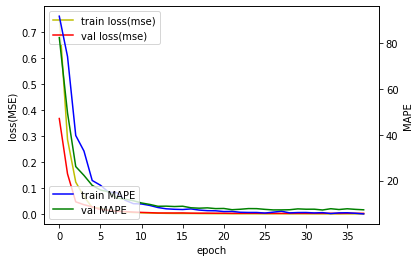

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

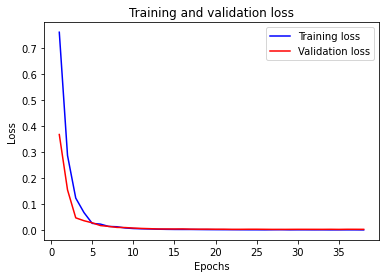

In [44]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

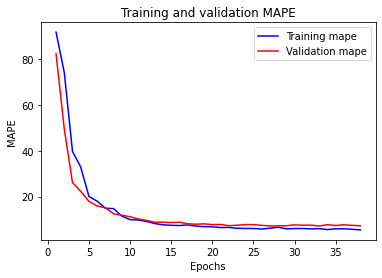

In [45]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [46]:
# 예측
y_pred = model.predict(test_features)

In [47]:
y_pred

array([[0.8653253 ],
       [0.6058404 ],
       [0.64160585],
       [0.9363476 ],
       [0.8454735 ],
       [0.57792646],
       [0.69366866],
       [0.5365328 ],
       [0.90772295],
       [0.4892608 ],
       [0.55401766],
       [0.71296847],
       [0.62472045],
       [0.54671407],
       [0.6320316 ],
       [0.7324022 ],
       [0.49126524],
       [0.49082178],
       [0.8208965 ],
       [0.6249294 ],
       [0.69177544],
       [0.6459098 ],
       [0.94022214],
       [0.4290424 ],
       [0.5864478 ],
       [0.5244343 ],
       [0.87412846],
       [0.6315153 ],
       [0.91442984],
       [0.7069437 ],
       [0.7987035 ],
       [0.7903734 ],
       [0.6582864 ],
       [0.90694237],
       [0.6072483 ],
       [0.7237001 ],
       [0.9012958 ],
       [0.72655356],
       [0.7939726 ],
       [0.92262673],
       [0.83341855],
       [0.5926554 ],
       [0.5866636 ],
       [0.54176164],
       [0.57232684],
       [0.51724076],
       [0.6214922 ],
       [0.785

In [48]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.724
test MSE: 0.005
tset MAPE: 0.080


#### c) Model 2

In [49]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

Epoch 1/200
6/6 [==============================] - 1s 44ms/step - loss: 0.3776 - mape: 71.0717 - val_loss: 0.0714 - val_mape: 30.9788 - lr: 0.0100
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0546 - mape: 27.1648 - val_loss: 0.0351 - val_mape: 22.0816 - lr: 0.0100
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0219 - mape: 17.4645 - val_loss: 0.0199 - val_mape: 16.2906 - lr: 0.0100
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0131 - mape: 13.4369 - val_loss: 0.0186 - val_mape: 15.4901 - lr: 0.0100
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0109 - mape: 12.8232 - val_loss: 0.0131 - val_mape: 12.3702 - lr: 0.0100
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0080 - mape: 10.6652 - val_loss: 0.0109 - val_mape: 12.2019 - lr: 0.0100
Epoch 7/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0077 - mape: 10.5876 - val_loss: 0.0092 - val_

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


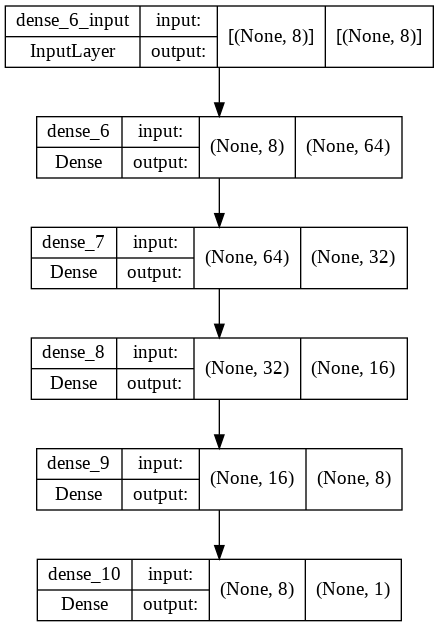

In [51]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [52]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-2.05155164e-01,  1.35699823e-01, -3.22822817e-02,
          2.65704721e-01, -2.12389112e-01,  1.46102160e-01,
         -1.94940433e-01, -1.82481945e-01, -1.00093126e-01,
         -1.91440791e-01, -1.07734457e-01, -8.36008787e-03,
          2.67396644e-02, -6.32130057e-02,  1.04782864e-01,
         -1.38346385e-02,  7.62820542e-02, -2.89993078e-01,
         -3.02791689e-02,  1.37418181e-01, -3.69095385e-01,
         -6.11643679e-02, -7.61556551e-02,  2.20128641e-01,
          1.67884946e-01,  4.22000624e-02, -2.24611044e-01,
          1.87282860e-01, -1.27208233e-01, -1.34693772e-01,
         -1.22675253e-03, -2.23269984e-01, -1.19423933e-01,
         -3.28348279e-02, -3.55876423e-02, -4.78993803e-02,
          1.14137769e-01,  1.36864886e-01, -3.74566168e-02,
         -1.28750086e-01, -2.20201239e-01, -2.40928568e-02,
          2.52087861e-02,  1.44822493e-01,  1.95386529e-01,
          3.11501235e-01, -1.55411288e-01,  1.45424768e-01,
          1.88269421e-01, -1.04594693e-0

In [53]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.205155,0.135700,-0.032282,0.265705,-0.212389,0.146102,-0.194940,-0.182482,-0.100093,-0.191441,...,-0.206984,-0.198512,-0.168189,0.020571,0.248804,0.104919,-0.110845,0.269938,-0.075011,0.003074
1,-0.212900,0.200153,0.062644,-0.111684,-0.022333,0.060897,-0.103705,-0.007463,0.330936,-0.032190,...,0.034745,-0.061051,0.290480,-0.000023,0.037817,0.227960,0.094152,-0.005799,0.031554,-0.165956
2,-0.205125,0.147017,-0.189963,0.160306,0.070597,0.092567,-0.196555,0.171222,0.209564,-0.169533,...,-0.079659,-0.145673,0.078258,0.236545,0.126329,-0.016682,0.285649,0.094197,-0.056278,-0.247001
3,-0.362775,-0.106217,0.149501,-0.249647,-0.159190,-0.010212,0.012078,-0.232834,0.220265,0.120541,...,-0.080843,0.221082,-0.264441,0.139514,0.188026,0.249961,0.067838,0.017114,-0.225747,0.229980
4,-0.327377,-0.199958,0.124742,-0.043477,-0.003999,-0.151773,-0.353087,0.269550,-0.109220,0.056407,...,-0.231917,-0.103210,0.185359,-0.137367,0.109807,0.135371,-0.242321,-0.229111,-0.162224,0.028577
5,0.083611,0.082510,0.087399,-0.196965,-0.166075,-0.365338,0.132116,0.256156,0.228105,-0.227538,...,0.238192,-0.206161,-0.167159,0.019775,-0.109763,-0.158024,-0.025013,-0.018621,0.199350,0.184422
6,0.096835,0.031913,-0.165415,0.009093,0.020813,0.137395,-0.068646,-0.099755,-0.055510,0.111706,...,0.077148,-0.212804,-0.254891,-0.208253,0.006009,0.288709,-0.045938,0.107968,0.269114,0.265749
7,-0.221122,-0.226730,-0.041680,-0.280556,-0.031101,-0.126958,-0.221078,0.126083,0.019571,-0.075115,...,-0.127494,0.200680,0.111954,-0.021733,0.150005,-0.271677,-0.158618,-0.050683,0.168236,0.308637


In [54]:
pd.DataFrame(model.get_weights()[1])

,0
0,0.083385
1,-0.048636
2,-0.064444
3,0.099273
4,-0.105758
...,...
59,0.104885
60,0.037787
61,0.009048
62,0.076940


In [55]:
pd.DataFrame(model.get_weights()[2])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.170668,-0.056871,-0.284508,-0.114198,0.008167,-0.283890,-0.026171,-0.054235,-0.054398,0.215520,...,-0.151719,0.256503,-0.172032,0.122684,0.138450,-0.193291,-0.058409,0.123966,-0.172695,-0.295487
1,-0.239621,-0.117557,-0.182947,0.274759,0.000208,0.128483,-0.017625,0.044650,0.132145,-0.113904,...,-0.214758,-0.142345,0.185193,0.026700,-0.152766,0.120419,0.002812,-0.330435,-0.031942,0.033753
2,0.179502,-0.116389,-0.073325,-0.151985,-0.078408,0.020652,0.072468,-0.054784,0.077925,0.125015,...,-0.115594,-0.048912,-0.037733,0.172084,0.082856,0.121805,-0.049044,0.135063,0.173196,-0.002816
3,-0.055397,-0.118616,-0.192332,0.087794,-0.121239,-0.179594,0.200360,-0.101388,-0.152415,0.279035,...,-0.138958,-0.170708,-0.116612,0.187507,-0.090994,0.110448,0.221964,0.080642,0.237469,-0.000620
4,-0.143345,-0.027505,0.153706,0.162028,0.206422,-0.053214,-0.046823,0.145761,-0.151181,-0.145643,...,0.047243,-0.106362,-0.140797,-0.236989,-0.162670,0.104667,0.082132,0.128188,0.219782,0.106328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.042489,0.163100,-0.237391,0.013093,-0.204641,0.051247,0.274284,-0.162442,-0.101828,0.232818,...,-0.200980,0.168258,0.170197,0.079367,-0.107258,-0.074065,0.296969,0.079382,0.143258,-0.279919
60,0.082758,-0.014082,0.057152,0.266144,0.196153,-0.159024,0.046894,-0.021800,0.068132,0.024492,...,0.056138,0.062562,-0.025914,0.042259,0.330419,-0.102718,-0.075225,-0.111011,-0.022129,0.012939
61,0.028940,-0.128863,-0.079138,0.035717,0.058786,-0.189366,-0.150524,-0.197314,-0.062600,0.153923,...,-0.233987,-0.152651,-0.176691,-0.209754,0.026510,-0.217295,0.131521,0.020570,-0.079021,-0.114053
62,0.223963,-0.176517,0.191643,0.018971,-0.227682,0.189160,0.219013,0.139721,-0.046694,0.156335,...,-0.219029,0.173603,0.120643,-0.145609,-0.078850,-0.276834,-0.004782,0.093546,0.162364,-0.213543


In [56]:
pd.DataFrame(model.get_weights()[3])

,0
0,0.051089
1,-0.012220
2,0.068863
3,0.091655
4,-0.043602
5,-0.063392
6,0.080778
7,-0.062205
8,-0.056515
9,0.121744


In [57]:
pd.DataFrame(model.get_weights()[4])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.020463,0.182814,-0.184793,-0.199806,0.209578,-0.043505,-0.406888,0.124785,-0.023497,-0.307185,0.301850,-0.311314,0.291646,-0.408148,-0.005407,0.139400
1,0.053457,0.020601,0.248027,-0.101761,-0.106071,0.170890,-0.335955,0.093127,0.088418,-0.321086,0.122024,0.126196,-0.119344,0.229544,0.045111,0.166489
2,0.104257,-0.345408,0.266916,-0.152090,-0.046771,-0.057662,-0.091889,0.161785,-0.093078,-0.445493,0.138720,-0.356059,0.263031,-0.201522,0.158651,-0.088840
3,0.032861,-0.041757,-0.217609,-0.274674,-0.079464,0.233500,-0.388558,0.344684,-0.112028,0.197469,0.263358,0.248889,0.211756,0.220014,0.260872,-0.329070
4,0.154418,-0.177291,0.397891,-0.179781,0.197501,-0.097266,0.240247,-0.001317,0.003913,-0.418818,-0.053162,-0.036473,-0.002313,-0.343656,0.022935,0.064187
5,0.074512,0.218271,-0.154578,0.072198,-0.029484,0.087519,-0.365376,-0.281605,-0.104466,-0.196473,0.268661,-0.135597,0.077574,-0.139100,0.150360,-0.130469
6,-0.138255,-0.197133,-0.063666,-0.381992,-0.078214,0.325740,-0.013842,0.187468,-0.065618,0.060724,0.320504,0.165379,-0.228721,-0.268313,0.376687,0.309563
7,0.070807,-0.063465,-0.119941,0.215390,-0.213255,0.123157,0.277818,0.127981,-0.044742,-0.276707,0.040271,-0.000964,-0.333093,-0.234659,0.155099,0.006715
8,-0.288818,0.202554,0.059733,0.093909,0.053904,-0.071574,-0.103562,-0.157134,-0.270658,-0.008215,0.196815,-0.067078,0.016623,-0.077226,-0.293826,0.350576
9,-0.323613,0.047957,-0.078199,-0.020633,-0.151082,-0.100028,-0.084638,-0.132442,0.027762,-0.445393,0.322713,-0.274913,-0.187081,-0.331313,-0.332109,-0.077110


In [58]:
pd.DataFrame(model.get_weights()[5])

,0
0,-0.043859
1,-0.077298
2,0.109170
3,-0.065679
4,-0.082889
5,0.141830
6,-0.061461
7,0.004289
8,-0.106087
9,-0.077551


In [59]:
pd.DataFrame(model.get_weights()[6])

,0,1,2,3,4,5,6,7
0,0.262381,0.148556,-0.447506,0.294854,0.473004,0.145654,-0.089434,-0.056237
1,-0.262806,-0.068373,0.573639,-0.270795,-0.199554,0.386567,-0.413561,0.413127
2,0.336032,-0.137241,-0.077090,0.296099,0.284671,-0.440314,-0.434781,-0.047190
3,-0.376740,-0.305924,-0.336176,0.292355,-0.306636,0.297028,0.107108,0.224262
4,0.106075,-0.233333,-0.207508,-0.037896,0.220440,-0.536353,0.137684,0.386508
5,0.247474,-0.226642,0.091697,-0.247473,-0.178435,0.085236,-0.240345,-0.244866
6,0.043353,-0.220812,-0.298400,0.225035,0.068655,0.221280,0.375405,0.316452
7,-0.007773,-0.227750,0.009531,-0.362265,-0.179684,-0.190234,-0.273215,-0.480276
8,-0.261030,-0.471913,-0.150719,-0.322610,-0.365090,-0.205606,0.003268,0.327096
9,0.243486,0.396038,-0.414488,0.331335,-0.058802,0.036607,0.082740,-0.193830


In [60]:
pd.DataFrame(model.get_weights()[7])

,0
0,0.143695
1,-0.083126
2,0.140808
3,-0.058781
4,0.091117
5,-0.062860
6,-0.082663
7,-0.071566


In [61]:
pd.DataFrame(model.get_weights()[8])

,0
0,0.793995
1,-0.034275
2,0.431881
3,-0.486406
4,0.645112
5,-0.591705
6,-0.454058
7,-0.483901


In [62]:
pd.DataFrame(model.get_weights()[9])

,0
0,0.121291


In [63]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [64]:
reg_history.history

{'loss': [0.37762007117271423,
  0.05458807572722435,
  0.021894384175539017,
  0.013079933822154999,
  0.010863073170185089,
  0.008031184785068035,
  0.0077059306204319,
  0.006029166746884584,
  0.005238865967839956,
  0.004750292282551527,
  0.004043167922645807,
  0.003889197250828147,
  0.0037741397973150015,
  0.0036754910834133625,
  0.003253461327403784,
  0.0033309177961200476,
  0.003360763657838106,
  0.0031486880034208298,
  0.002978788921609521,
  0.002768471837043762,
  0.0026689721271395683,
  0.0027325351256877184,
  0.0025916078593581915,
  0.0028868154622614384,
  0.0025221859104931355,
  0.0026090689934790134,
  0.0025359613355249166,
  0.0029077036306262016,
  0.0026951765175908804,
  0.002101364079862833,
  0.0020716406870633364,
  0.0018995101563632488,
  0.0019484013319015503,
  0.0016551411245018244,
  0.0015822522109374404,
  0.001585936057381332,
  0.001788538764230907],
 'lr': [0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0

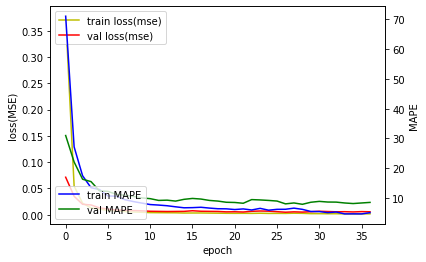

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

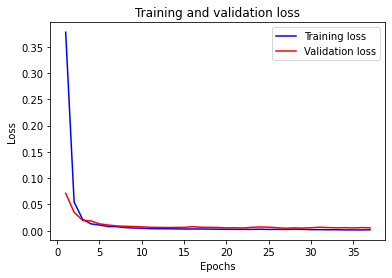

In [66]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

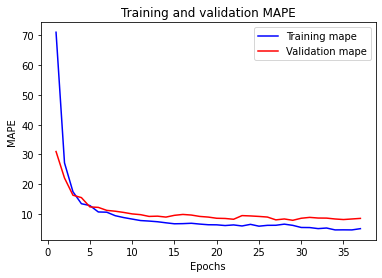

In [67]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [68]:
# 예측
y_pred = model.predict(test_features)

In [69]:
y_pred

array([[0.8298635 ],
       [0.5926    ],
       [0.62079704],
       [0.9430516 ],
       [0.78509754],
       [0.64706236],
       [0.6519547 ],
       [0.53730965],
       [0.91374135],
       [0.4891172 ],
       [0.5706936 ],
       [0.72574425],
       [0.64358085],
       [0.52031356],
       [0.6361614 ],
       [0.6876774 ],
       [0.4730971 ],
       [0.47236043],
       [0.77493966],
       [0.601883  ],
       [0.6688245 ],
       [0.6699231 ],
       [0.9072653 ],
       [0.46901113],
       [0.56709933],
       [0.4235986 ],
       [0.89492714],
       [0.61963433],
       [0.8944619 ],
       [0.6591704 ],
       [0.767778  ],
       [0.82629484],
       [0.6322084 ],
       [0.9154042 ],
       [0.5959683 ],
       [0.7196691 ],
       [0.8661854 ],
       [0.6961032 ],
       [0.8126228 ],
       [0.8864894 ],
       [0.82863563],
       [0.5987296 ],
       [0.6105283 ],
       [0.5578003 ],
       [0.5871411 ],
       [0.5321155 ],
       [0.5822858 ],
       [0.803

In [70]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.689
test MSE: 0.005
tset MAPE: 0.085


#### d) Model 3

In [71]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

Epoch 1/200
6/6 [==============================] - 1s 40ms/step - loss: 0.2591 - mape: 61.1253 - val_loss: 0.0764 - val_mape: 34.3275 - lr: 0.0100
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0982 - mape: 38.8863 - val_loss: 0.0601 - val_mape: 27.1396 - lr: 0.0100
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0554 - mape: 27.3859 - val_loss: 0.0270 - val_mape: 19.8314 - lr: 0.0100
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0334 - mape: 22.4108 - val_loss: 0.0311 - val_mape: 21.1116 - lr: 0.0100
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0181 - mape: 15.4422 - val_loss: 0.0275 - val_mape: 17.4706 - lr: 0.0100
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0187 - mape: 15.3859 - val_loss: 0.0146 - val_mape: 13.8262 - lr: 0.0100
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0141 - mape: 14.3340 - val_loss: 0.0117 - val_mape

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                576       
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


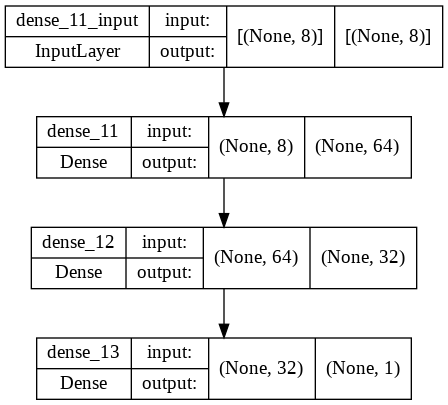

In [73]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [74]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.17879596,  0.277808  ,  0.05872752,  0.15882118, -0.3224483 ,
          0.04663295, -0.17796655, -0.15934356, -0.04959119, -0.18088607,
         -0.30691758,  0.07264365,  0.01114544, -0.17388357, -0.0012291 ,
          0.02802051,  0.0708276 , -0.1818849 ,  0.05544792,  0.23328398,
         -0.2996112 , -0.05300201, -0.103866  ,  0.20833583,  0.08096957,
         -0.20393048, -0.29413378,  0.18178272, -0.13970652,  0.01191693,
          0.03589587, -0.16727786, -0.04177236, -0.010253  ,  0.0094075 ,
         -0.00721261,  0.32915565,  0.11128547, -0.0119263 , -0.13102974,
         -0.10596789, -0.06133188, -0.0148424 ,  0.11936013,  0.28122503,
          0.17691389, -0.1253438 ,  0.11236099,  0.15625772,  0.24779049,
         -0.13962395,  0.01578343,  0.17725958, -0.36497936, -0.11312365,
         -0.258249  , -0.17437871,  0.08678629,  0.0842827 ,  0.18740493,
          0.00236495,  0.16432832, -0.07857697, -0.08959544],
        [-0.04244245,  0.18749101,  0.10229946,  0

In [75]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.178796,0.277808,0.058728,0.158821,-0.322448,0.046633,-0.177967,-0.159344,-0.049591,-0.180886,...,-0.113124,-0.258249,-0.174379,0.086786,0.084283,0.187405,0.002365,0.164328,-0.078577,-0.089595
1,-0.042442,0.187491,0.102299,0.046617,0.021142,0.029366,0.054351,-0.041457,0.218773,0.007483,...,0.090236,-0.070481,0.303313,-0.020358,0.047095,0.235460,0.094568,-0.020771,-0.014390,-0.181228
2,-0.087942,0.138290,-0.168557,0.260967,0.088684,0.190288,-0.092572,0.107415,0.055963,-0.157653,...,-0.052335,-0.139875,0.093299,0.206803,0.167315,-0.040692,0.253397,0.067278,-0.152490,-0.286458
3,-0.182255,-0.104265,0.133897,-0.176460,-0.180450,0.082848,0.147645,-0.220647,0.031700,0.087358,...,-0.097698,0.254657,-0.046690,0.003723,0.212248,0.228581,0.060931,0.016535,-0.233274,0.235250
4,-0.135554,-0.239717,0.127563,0.097800,-0.060260,-0.111331,-0.201949,0.208081,-0.256780,0.029298,...,-0.201439,-0.090383,0.319863,-0.111945,0.122538,0.072050,-0.166333,-0.181038,-0.137461,-0.005328
5,0.261514,0.017676,0.105980,-0.132843,-0.187951,-0.229529,0.351904,0.181551,0.207198,-0.265003,...,0.224355,-0.210398,-0.057590,0.061487,-0.114323,-0.180102,0.003933,0.014992,0.141377,0.159929
6,0.261245,0.013758,-0.156362,0.118978,0.050593,0.212785,-0.031803,-0.181256,-0.242755,0.166099,...,0.131726,-0.221347,-0.235531,-0.212321,0.047863,0.243967,0.021162,0.097826,0.237392,0.220226
7,-0.117656,-0.163625,-0.029320,-0.130931,0.058706,-0.054305,-0.168920,-0.039035,-0.094607,-0.269799,...,-0.136209,0.179946,-0.052617,-0.173891,0.295092,-0.239205,-0.041259,0.158085,0.009706,0.308248


In [76]:
pd.DataFrame(model.get_weights()[1])

,0
0,-0.098616
1,-0.084556
2,-0.068335
3,-0.047089
4,0.055927
...,...
59,-0.070866
60,0.035109
61,-0.027528
62,-0.009454


In [77]:
pd.DataFrame(model.get_weights()[2])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.204676,0.005459,-0.321629,-0.245443,0.090952,-0.256716,-0.118439,0.024900,0.012725,0.112783,...,-0.161423,0.166699,-0.116816,0.133609,0.221395,-0.151879,-0.149719,0.108426,-0.198742,-0.250972
1,-0.119013,-0.113328,-0.261261,0.145605,-0.023799,0.136908,-0.143983,0.086453,0.189668,-0.258053,...,-0.238725,-0.203251,0.214062,0.051075,-0.148225,0.138564,-0.119012,-0.200685,-0.015266,0.107135
2,0.109148,-0.061591,-0.101400,-0.190028,-0.069251,0.050506,-0.033158,0.017496,0.145420,0.017764,...,-0.088814,-0.072769,-0.048390,0.198107,0.135114,0.182238,-0.155227,0.039104,0.212510,0.046279
3,-0.139448,-0.115964,-0.146007,-0.078224,-0.166965,-0.169642,0.142716,-0.109851,-0.100053,0.173755,...,-0.145743,-0.256061,-0.077519,0.217817,-0.048909,0.110363,0.137252,0.219115,0.196126,0.030381
4,0.058303,-0.120823,0.015462,0.100717,0.162320,0.008285,-0.225075,0.158121,-0.126503,-0.270057,...,-0.028379,-0.101303,-0.298169,-0.179648,-0.100613,0.057717,-0.042129,0.115988,0.079649,0.098988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.150397,0.127069,-0.282487,-0.084222,-0.139868,-0.129031,0.202908,-0.126442,-0.092195,0.149763,...,-0.239351,0.079577,0.216066,0.019356,-0.052458,0.008018,0.159211,0.106607,0.162772,-0.243078
60,-0.048460,-0.140004,-0.017941,0.172079,0.211435,-0.198569,-0.010920,-0.019609,0.052990,-0.025170,...,-0.033923,-0.008588,-0.039908,0.070034,0.092361,-0.088358,-0.184672,-0.060641,-0.057330,0.010881
61,-0.032777,-0.071666,-0.211144,-0.033020,0.086791,-0.164671,-0.160869,-0.160194,-0.050708,0.035039,...,-0.213899,-0.059616,-0.201419,-0.240823,0.104439,-0.238808,0.072952,0.082461,-0.195838,-0.036199
62,0.224285,-0.162818,0.117593,-0.067858,-0.121849,0.021525,0.121809,0.221922,-0.073191,0.086935,...,-0.238247,-0.017906,0.153799,-0.177956,0.081252,-0.273340,-0.204493,0.018062,0.134922,-0.144926


In [78]:
pd.DataFrame(model.get_weights()[3])

,0
0,-0.195879
1,-0.024050
2,-0.071929
3,-0.058376
4,0.063533
5,-0.076890
6,-0.067353
7,0.060980
8,0.013558
9,-0.072464


In [79]:
pd.DataFrame(model.get_weights()[4])

,0
0,-0.053102
1,0.208293
2,-0.130310
3,-0.105750
4,0.267638
5,-0.036579
6,-0.356081
7,0.037025
8,0.080044
9,-0.170868


In [80]:
pd.DataFrame(model.get_weights()[5])

,0
0,0.125399


In [81]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [82]:
reg_history.history

{'loss': [0.25906455516815186,
  0.0981929749250412,
  0.05543924495577812,
  0.03343367949128151,
  0.018067579716444016,
  0.01865777187049389,
  0.014135879464447498,
  0.010481182485818863,
  0.008734586648643017,
  0.007137728855013847,
  0.006582190748304129,
  0.005454584490507841,
  0.004963330924510956,
  0.004274286795407534,
  0.003936736844480038,
  0.0036308174021542072,
  0.003570470493286848,
  0.0031839997973293066,
  0.002983980579301715,
  0.0026062247343361378,
  0.002548144431784749,
  0.0023992499336600304,
  0.002263820730149746,
  0.002521645976230502,
  0.002548827324062586,
  0.002406646031886339,
  0.0037136999890208244,
  0.0037519573234021664,
  0.0027325227856636047,
  0.0026989963371306658,
  0.00276058167219162,
  0.002379885409027338,
  0.0023131491616368294,
  0.0020107398740947247,
  0.001923131407238543,
  0.0018778222147375345,
  0.0018062115414068103,
  0.0017619947902858257,
  0.0017334832809865475,
  0.0017076530493795872,
  0.0016893689753487706,

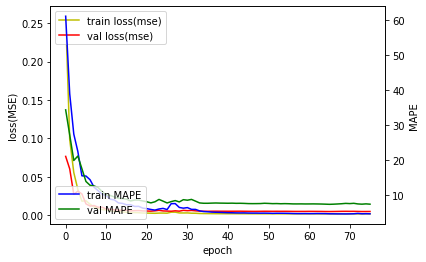

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

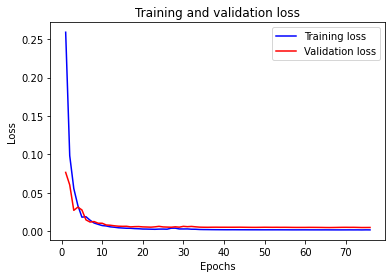

In [84]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

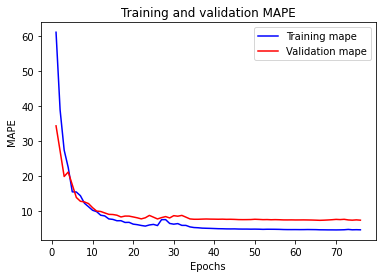

In [85]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [86]:
# 예측
y_pred = model.predict(test_features)

In [87]:
y_pred

array([[0.81960976],
       [0.56563497],
       [0.6701004 ],
       [0.9283566 ],
       [0.8061804 ],
       [0.53090084],
       [0.70019287],
       [0.524321  ],
       [0.8762844 ],
       [0.48646116],
       [0.59682256],
       [0.7669085 ],
       [0.7151693 ],
       [0.5536778 ],
       [0.69504446],
       [0.70277363],
       [0.5075745 ],
       [0.5187587 ],
       [0.8086185 ],
       [0.60677576],
       [0.64747506],
       [0.7032253 ],
       [0.9323455 ],
       [0.39912957],
       [0.5977115 ],
       [0.4742068 ],
       [0.86176914],
       [0.66716254],
       [0.9098172 ],
       [0.6762811 ],
       [0.7518656 ],
       [0.7424314 ],
       [0.6537296 ],
       [0.90079224],
       [0.6841441 ],
       [0.70331573],
       [0.87718606],
       [0.64731807],
       [0.84181744],
       [0.8824842 ],
       [0.8329391 ],
       [0.61883235],
       [0.6631846 ],
       [0.57805794],
       [0.5515889 ],
       [0.52937907],
       [0.6380144 ],
       [0.812

In [88]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.771
test MSE: 0.004
tset MAPE: 0.073


### RQ2

#### e) Model 1

In [89]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'tanh', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'tanh'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min", restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode="min", min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

Epoch 1/200
6/6 [==============================] - 1s 38ms/step - loss: 0.4315 - mape: 76.3110 - val_loss: 0.2173 - val_mape: 51.1344 - lr: 0.0100
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1304 - mape: 43.5715 - val_loss: 0.1206 - val_mape: 41.9172 - lr: 0.0100
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0664 - mape: 30.9657 - val_loss: 0.0399 - val_mape: 20.5246 - lr: 0.0100
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0408 - mape: 23.2909 - val_loss: 0.0300 - val_mape: 19.2760 - lr: 0.0100
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0315 - mape: 19.3705 - val_loss: 0.0148 - val_mape: 14.4832 - lr: 0.0100
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0248 - mape: 19.0846 - val_loss: 0.0110 - val_mape: 12.4198 - lr: 0.0100
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0156 - mape: 14.9016 - val_loss: 0.0104 - val_map

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                576       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


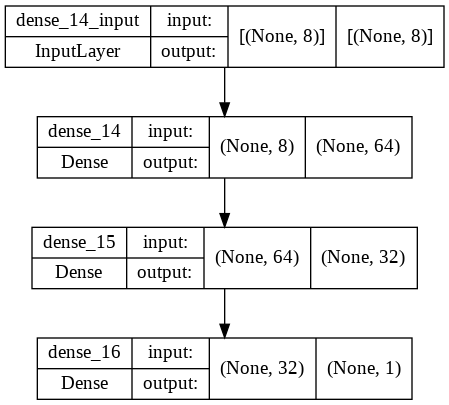

In [91]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [92]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.30671698,  0.23742293,  0.03908409,  0.14712612, -0.2358886 ,
          0.09038322, -0.08907001, -0.10896889, -0.03992226, -0.139401  ,
         -0.18239205,  0.03421578, -0.04276705, -0.17012872,  0.12195001,
          0.00547722,  0.05902426, -0.28685445, -0.02835608,  0.31393358,
         -0.20082086, -0.07127981, -0.01112489,  0.19943383,  0.18516831,
         -0.04735119, -0.2959614 ,  0.1935663 , -0.08737072, -0.09543785,
          0.0550852 , -0.1132507 , -0.07337686, -0.02526689,  0.05106192,
          0.00058453,  0.15157959,  0.10315369, -0.06833389, -0.14657113,
         -0.07184058,  0.0260609 , -0.06421614,  0.16092753,  0.21238099,
          0.24797381, -0.02219943,  0.10704732,  0.17199558,  0.12161157,
         -0.14696491,  0.08852547,  0.19895838, -0.24121892, -0.22538409,
         -0.30709618,  0.07653157,  0.12002844,  0.20908804,  0.11580097,
         -0.02981051,  0.21578903,  0.07534637,  0.06670853],
        [-0.13932212,  0.16436073,  0.07757527, -0

In [93]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.306717,0.237423,0.039084,0.147126,-0.235889,0.090383,-0.089070,-0.108969,-0.039922,-0.139401,...,-0.225384,-0.307096,0.076532,0.120028,0.209088,0.115801,-0.029811,0.215789,0.075346,0.066709
1,-0.139322,0.164361,0.077575,-0.038537,0.033040,-0.003483,0.028466,-0.012879,0.218589,0.003369,...,0.061857,-0.065392,0.206232,0.030557,0.067903,0.208779,0.007977,-0.031502,0.016807,-0.111921
2,-0.136880,0.102372,-0.112469,0.229218,0.111140,0.162992,0.007566,0.109592,0.004034,-0.100109,...,-0.060440,-0.139234,0.024235,0.197195,0.162156,-0.039255,0.197955,0.077904,-0.066937,-0.271625
3,-0.252933,-0.135874,0.139551,-0.200686,-0.175425,0.115023,0.162084,-0.268529,0.052427,0.145660,...,-0.133807,0.280530,-0.243003,0.068172,0.239818,0.227231,0.027513,-0.001124,-0.254220,0.228238
4,-0.216300,-0.258357,0.083238,0.016442,-0.059461,-0.172751,-0.286313,0.204497,-0.170550,0.035871,...,-0.255107,-0.074515,0.235694,-0.126570,0.169242,0.089808,-0.190243,-0.232504,-0.302908,0.030534
5,0.219729,0.023132,-0.013183,-0.168808,-0.153917,-0.267230,0.200158,0.184451,0.215242,-0.201642,...,0.199259,-0.219227,-0.057654,0.054325,-0.040294,-0.177219,0.012145,0.014365,0.056908,0.242581
6,0.183566,-0.002424,-0.211266,0.056455,0.035845,0.150080,0.046801,-0.142738,-0.163034,0.175395,...,0.099022,-0.216268,-0.279633,-0.169822,0.046804,0.255659,-0.011168,0.071912,0.168552,0.295448
7,-0.159550,-0.218587,-0.177180,-0.178491,0.036650,-0.201442,-0.128909,0.112346,0.120711,-0.184044,...,-0.165608,0.160697,0.081754,-0.011325,0.253752,-0.269563,-0.082838,0.055575,0.120421,0.299604


In [94]:
pd.DataFrame(model.get_weights()[1])

,0
0,0.108742
1,-0.099077
2,0.125491
3,-0.087618
4,0.077486
...,...
59,-0.090729
60,-0.123416
61,0.079629
62,-0.016943


In [95]:
pd.DataFrame(model.get_weights()[2])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.159025,-0.002246,-0.232751,-0.168787,0.109158,-0.229650,-0.030633,-0.001060,-0.010686,0.210141,...,-0.086270,0.202828,-0.157467,0.218330,0.207695,-0.171275,-0.092382,0.075532,-0.227357,-0.258794
1,-0.240006,-0.084880,-0.221579,0.210749,-0.022194,0.178646,-0.083489,0.104105,0.191574,-0.188540,...,-0.154945,-0.128615,0.164917,0.092783,-0.102689,0.123103,-0.083023,-0.195754,-0.081919,0.092813
2,0.176400,-0.055579,-0.038619,-0.148068,-0.054688,0.070449,0.016434,0.003287,0.150031,0.092978,...,-0.028322,-0.040939,-0.007834,0.221880,0.152236,0.183120,-0.098883,0.035891,0.192491,0.063377
3,0.056727,-0.056337,-0.156515,-0.001973,-0.129157,-0.122466,0.208194,-0.044358,-0.092756,0.254584,...,-0.075483,-0.193822,-0.077096,0.267695,-0.009220,0.094795,0.177101,0.218418,0.178997,0.051738
4,-0.201366,-0.084540,0.114182,0.168508,0.211659,0.020143,-0.103778,0.183142,-0.112334,-0.187442,...,0.045267,-0.079867,-0.262752,-0.139893,-0.062351,0.098641,0.010185,0.111261,0.120243,0.145062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.043753,0.049835,-0.233124,-0.053894,-0.123556,0.085368,0.208206,-0.102740,-0.031427,0.221991,...,-0.173927,0.115083,0.239771,0.114807,0.013647,0.009620,0.232263,0.107444,0.152490,-0.216437
60,0.066231,-0.086594,0.051940,0.205374,0.255132,-0.089441,-0.002054,0.039097,0.115796,-0.002335,...,0.052272,0.106583,-0.001442,0.111685,0.166630,-0.058073,-0.126765,-0.015689,-0.025751,0.073494
61,-0.011725,-0.117401,-0.118453,0.049164,0.091111,-0.109279,-0.119730,-0.131217,-0.033579,0.096151,...,-0.134023,0.009796,-0.204846,-0.203426,0.113522,-0.212504,0.145160,0.103367,-0.184454,-0.061220
62,0.181804,-0.215792,0.178260,-0.019760,-0.135203,-0.000485,0.153664,0.220810,-0.025736,0.104347,...,-0.198021,0.104057,0.194894,-0.137884,0.052949,-0.176221,-0.169643,0.080420,0.205077,-0.143602


In [96]:
pd.DataFrame(model.get_weights()[3])

,0
0,0.110030
1,0.104253
2,-0.104155
3,-0.118950
4,0.126080
5,-0.094840
6,-0.088647
7,0.106355
8,0.113797
9,-0.097538


In [97]:
pd.DataFrame(model.get_weights()[4])

,0
0,-0.002348
1,0.205496
2,-0.136926
3,-0.105368
4,0.267599
5,-0.004252
6,-0.363823
7,0.008064
8,0.022892
9,-0.182434


In [98]:
pd.DataFrame(model.get_weights()[5])

,0
0,0.127386


In [99]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [100]:
reg_history.history

{'loss': [0.4315420389175415,
  0.13035406172275543,
  0.06638413667678833,
  0.04077741131186485,
  0.03151155263185501,
  0.024833571165800095,
  0.015587680041790009,
  0.01366092637181282,
  0.010878436267375946,
  0.008148754015564919,
  0.007933132350444794,
  0.005645491182804108,
  0.006193915847688913,
  0.007352756801992655,
  0.0056186881847679615,
  0.006602003239095211,
  0.005111746024340391,
  0.004400712437927723,
  0.00405810447409749,
  0.003798785852268338,
  0.0037059527821838856,
  0.0036202282644808292,
  0.0033731823787093163,
  0.0034080306068062782,
  0.0034196022897958755,
  0.0032500468660146,
  0.003698161570355296,
  0.003405711380764842,
  0.003218613564968109,
  0.0030952231027185917,
  0.003042253665626049],
 'lr': [0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.001,
  0.001,
  0.001,
 

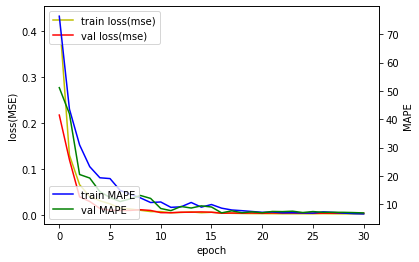

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

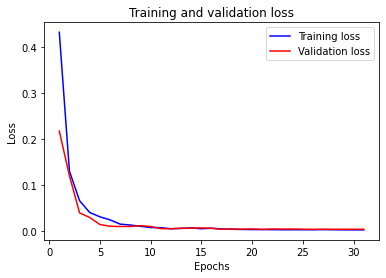

In [102]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

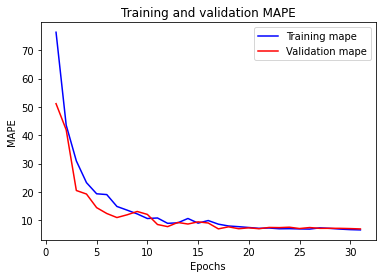

In [103]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [104]:
# 예측
y_pred = model.predict(test_features)

In [105]:
y_pred

array([[0.8526239 ],
       [0.6737355 ],
       [0.6954361 ],
       [0.932418  ],
       [0.81612766],
       [0.5975059 ],
       [0.756143  ],
       [0.49290264],
       [0.9525172 ],
       [0.5653317 ],
       [0.4898467 ],
       [0.77092177],
       [0.70800567],
       [0.5758696 ],
       [0.6559434 ],
       [0.73401725],
       [0.40487176],
       [0.60146326],
       [0.80509484],
       [0.658736  ],
       [0.745188  ],
       [0.6841887 ],
       [0.939289  ],
       [0.40401047],
       [0.646742  ],
       [0.5577314 ],
       [0.8027889 ],
       [0.6650734 ],
       [0.89955753],
       [0.73153853],
       [0.87499166],
       [0.79142755],
       [0.68292755],
       [0.90825886],
       [0.57085246],
       [0.74497795],
       [0.90919924],
       [0.6139607 ],
       [0.8329034 ],
       [0.9222349 ],
       [0.8614315 ],
       [0.63569677],
       [0.6110484 ],
       [0.47870314],
       [0.5437812 ],
       [0.5973354 ],
       [0.6858605 ],
       [0.833

In [106]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.716
test MSE: 0.005
tset MAPE: 0.081


#### f) Model 2

In [107]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'sigmoid', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'sigmoid'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

Epoch 1/200
6/6 [==============================] - 1s 37ms/step - loss: 0.0736 - mape: 34.6228 - val_loss: 0.0263 - val_mape: 20.7767 - lr: 0.0100
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0270 - mape: 21.0004 - val_loss: 0.0086 - val_mape: 11.0366 - lr: 0.0100
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0213 - mape: 17.8511 - val_loss: 0.0188 - val_mape: 17.9490 - lr: 0.0100
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0137 - mape: 15.0515 - val_loss: 0.0136 - val_mape: 14.1893 - lr: 0.0100
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0081 - mape: 11.1867 - val_loss: 0.0061 - val_mape: 9.4184 - lr: 0.0100
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0070 - mape: 10.4090 - val_loss: 0.0041 - val_mape: 7.3289 - lr: 0.0100
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0067 - mape: 10.2141 - val_loss: 0.0078 - val_mape

In [108]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                576       
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


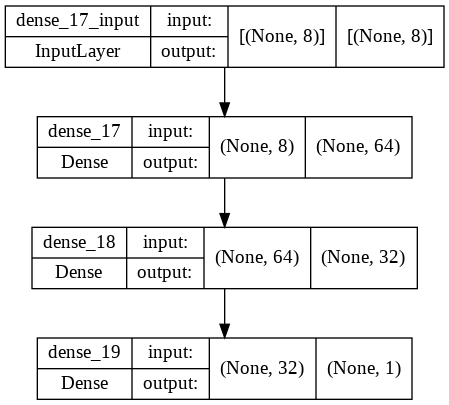

In [109]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [110]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-2.48897940e-01,  2.46726915e-01, -4.77795117e-03,
          1.61488503e-01, -2.35563442e-01,  1.39379933e-01,
         -1.99467674e-01, -1.33386642e-01,  8.86899084e-02,
         -1.59706905e-01, -1.47281587e-01, -1.42999003e-02,
          1.37354463e-01, -2.09007531e-01,  1.58818007e-01,
          6.10285923e-02,  1.88850239e-01, -2.48250619e-01,
         -1.99516565e-02,  3.25133771e-01, -2.00464740e-01,
         -6.18230551e-02,  8.07373784e-03,  3.46657753e-01,
          1.09649740e-01,  1.09591700e-01, -2.79561847e-01,
          2.36897767e-01, -9.51085612e-02, -8.77855569e-02,
          6.35766312e-02, -1.01036005e-01, -1.09523349e-01,
          6.06259294e-02, -4.20594215e-02,  3.94553430e-02,
          3.63230795e-01,  1.34034857e-01, -9.48205963e-02,
         -1.11787319e-01, -1.15843073e-01,  5.92119731e-02,
         -6.82469085e-02,  1.48737133e-01,  2.12820500e-01,
          2.44472221e-01,  6.35081343e-03,  3.87322634e-01,
          1.68240249e-01,  2.91956645e-0

In [111]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.248898,0.246727,-0.004778,0.161489,-0.235563,0.139380,-0.199468,-0.133387,0.088690,-0.159707,...,-0.259899,-0.329669,-0.078649,0.218756,0.246507,0.146730,0.117453,0.259916,-0.039791,0.112161
1,-0.080482,0.181277,0.134322,-0.063261,0.064458,0.027886,-0.018039,-0.056448,0.325225,0.075503,...,-0.031093,-0.090725,0.315564,0.092397,0.100737,0.176670,0.170412,0.036113,0.029274,-0.106201
2,-0.111399,0.103053,-0.177760,0.207210,0.123671,0.167102,-0.141035,0.088097,0.158439,-0.062411,...,-0.144263,-0.177522,0.098259,0.291204,0.193725,-0.076084,0.288231,0.140639,-0.073787,-0.263095
3,-0.264347,-0.112451,0.187032,-0.170675,-0.199798,0.125936,0.109577,-0.240126,0.169277,0.142687,...,-0.169818,0.272157,-0.199216,0.147811,0.234638,0.281922,0.100290,0.026988,-0.182867,0.220382
4,-0.204464,-0.265626,0.131412,-0.029303,-0.070813,-0.191628,-0.287250,0.197140,-0.159376,0.038215,...,-0.309124,-0.105690,0.232246,-0.054344,0.208411,0.081725,-0.106223,-0.168554,-0.139391,0.105784
5,0.262271,-0.031926,0.019360,-0.235280,-0.125710,-0.280759,0.189780,0.150851,0.255673,-0.186576,...,0.135783,-0.260621,-0.012820,0.097517,-0.018997,-0.203077,0.101759,0.087362,0.162206,0.353894
6,0.327046,-0.080996,-0.197236,-0.058455,0.138068,0.095976,-0.060524,-0.255844,-0.032730,0.321742,...,-0.069529,-0.352106,-0.172030,-0.051573,0.182148,0.146886,0.134886,0.228355,0.191448,0.415166
7,-0.127564,-0.273664,-0.067510,-0.212935,0.057509,-0.182234,-0.137281,0.062331,0.070960,-0.151677,...,-0.238695,0.132890,0.082798,-0.023112,0.243613,-0.255698,-0.043216,0.099846,0.086696,0.298539


In [112]:
pd.DataFrame(model.get_weights()[1])

,0
0,-0.041585
1,-0.076022
2,-0.220471
3,-0.026677
4,-0.006558
...,...
59,-0.053056
60,-0.093601
61,-0.002111
62,-0.088094


In [113]:
pd.DataFrame(model.get_weights()[2])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.193474,-0.002593,-0.269265,-0.199169,0.132396,-0.249056,-0.040661,0.003563,-0.004834,0.170641,...,-0.119693,0.168455,-0.118124,0.168436,0.213150,-0.160981,-0.160121,0.106897,-0.219035,-0.218166
1,-0.297588,-0.102631,-0.225840,0.199615,-0.012843,0.157415,-0.060954,0.105391,0.184204,-0.203968,...,-0.175723,-0.194858,0.171408,0.069688,-0.123086,0.125695,-0.130051,-0.203246,-0.102273,0.119651
2,0.156273,-0.084036,-0.038810,-0.141943,-0.045908,0.062529,0.040566,0.001782,0.132249,0.080324,...,-0.037963,-0.073340,-0.000960,0.229890,0.127745,0.166649,-0.167276,0.032069,0.192684,0.075837
3,-0.007799,-0.070143,-0.170279,-0.019764,-0.118104,-0.144973,0.228783,-0.040933,-0.095975,0.224372,...,-0.100149,-0.261560,-0.064026,0.222612,-0.023124,0.098396,0.126487,0.222501,0.154930,0.086191
4,-0.253254,-0.076584,0.071752,0.137758,0.233469,-0.022037,-0.132636,0.200327,-0.107154,-0.224520,...,0.016491,-0.103168,-0.214402,-0.183746,-0.047706,0.118644,-0.048681,0.150685,0.116388,0.183722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.092835,0.016790,-0.243031,-0.067321,-0.130623,0.047723,0.221032,-0.097883,-0.049902,0.234122,...,-0.189460,0.016095,0.213814,0.128960,0.007825,0.008112,0.163477,0.120532,0.140415,-0.215348
60,-0.014410,-0.090164,0.026386,0.178654,0.259537,-0.121897,-0.012484,0.035928,0.106741,0.011890,...,0.029825,-0.002820,-0.002622,0.103066,0.173648,-0.040109,-0.177865,0.005856,-0.047789,0.087741
61,-0.085129,-0.085808,-0.172729,-0.007325,0.121277,-0.172682,-0.155538,-0.141041,-0.021300,0.074821,...,-0.173988,-0.056898,-0.183508,-0.223480,0.142000,-0.179258,0.069346,0.152458,-0.184596,-0.017013
62,0.155803,-0.225194,0.153198,-0.052009,-0.140816,-0.007966,0.156727,0.205204,-0.041821,0.143613,...,-0.205411,0.020428,0.161775,-0.106099,0.035501,-0.179040,-0.217307,0.083445,0.150341,-0.145887


In [114]:
pd.DataFrame(model.get_weights()[3])

,0
0,-0.049756
1,-0.011890
2,-0.022315
3,-0.022524
4,0.012701
5,-0.027585
6,-0.001937
7,-0.002972
8,-0.009000
9,-0.004935


In [115]:
pd.DataFrame(model.get_weights()[4])

,0
0,0.001988
1,0.251550
2,-0.172314
3,-0.141716
4,0.349985
5,-0.031442
6,-0.395843
7,0.059137
8,0.073580
9,-0.215721


In [116]:
pd.DataFrame(model.get_weights()[5])

,0
0,0.006526


In [117]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [118]:
reg_history.history

{'loss': [0.07363530993461609,
  0.027005236595869064,
  0.021302957087755203,
  0.013686212711036205,
  0.008067197166383266,
  0.006977411452680826,
  0.006723983213305473,
  0.007826611399650574,
  0.006318469997495413,
  0.005590599030256271,
  0.004715004004538059,
  0.004920013714581728,
  0.004237006884068251,
  0.003909314051270485,
  0.003954184241592884,
  0.003919771406799555,
  0.004009627737104893,
  0.0038583099376410246,
  0.0039038897957652807,
  0.003933344502002001,
  0.005234144628047943,
  0.005568966269493103,
  0.006415628828108311,
  0.003836121177300811,
  0.004423497244715691,
  0.0037945620715618134,
  0.004326916765421629,
  0.0038656655233353376,
  0.004141299054026604,
  0.0037711835466325283,
  0.003801319282501936,
  0.003708657342940569,
  0.00376264750957489,
  0.003751724725589156,
  0.003909221384674311,
  0.0038399717304855585,
  0.0037040472961962223,
  0.004174553789198399,
  0.003675632644444704,
  0.003780181985348463,
  0.0036804964765906334,
  

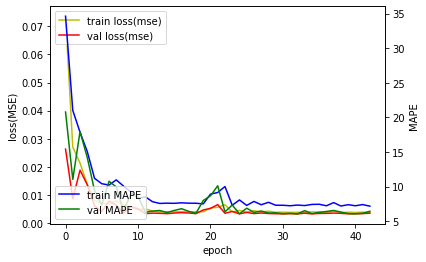

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

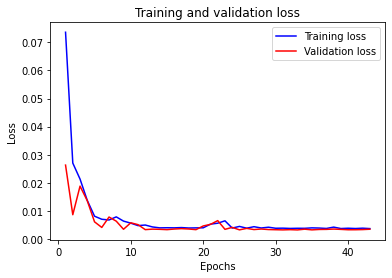

In [120]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

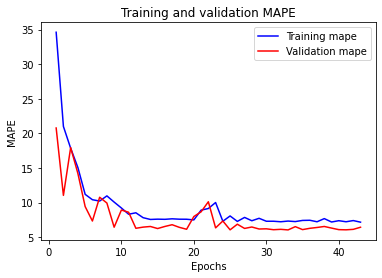

In [121]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [122]:
# 예측
y_pred = model.predict(test_features)

In [123]:
y_pred

array([[0.8252875 ],
       [0.63061494],
       [0.6624051 ],
       [0.9261305 ],
       [0.7991913 ],
       [0.61033404],
       [0.67245185],
       [0.5202482 ],
       [0.93216753],
       [0.51680803],
       [0.5264653 ],
       [0.757378  ],
       [0.6921935 ],
       [0.5306144 ],
       [0.5991127 ],
       [0.7743894 ],
       [0.47432077],
       [0.5604615 ],
       [0.81596255],
       [0.64406383],
       [0.7120575 ],
       [0.6982204 ],
       [0.88550776],
       [0.43074626],
       [0.59431195],
       [0.5342644 ],
       [0.83734936],
       [0.6160691 ],
       [0.8769222 ],
       [0.7357341 ],
       [0.80530345],
       [0.7749273 ],
       [0.6364503 ],
       [0.8841734 ],
       [0.59839576],
       [0.69656134],
       [0.8649037 ],
       [0.6405699 ],
       [0.8619591 ],
       [0.90121037],
       [0.8570833 ],
       [0.65116197],
       [0.6080055 ],
       [0.49227527],
       [0.6069413 ],
       [0.5502029 ],
       [0.61256415],
       [0.796

In [124]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.757
test MSE: 0.004
tset MAPE: 0.077


#### g) Model 3

In [134]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'LeakyReLU', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'LeakyReLU'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

Epoch 1/200
6/6 [==============================] - 1s 40ms/step - loss: 0.2738 - mape: 62.3802 - val_loss: 0.0982 - val_mape: 35.5085 - lr: 0.0100
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1082 - mape: 38.0549 - val_loss: 0.0555 - val_mape: 25.9250 - lr: 0.0100
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0530 - mape: 27.5662 - val_loss: 0.0290 - val_mape: 19.8063 - lr: 0.0100
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0288 - mape: 20.8618 - val_loss: 0.0282 - val_mape: 19.2745 - lr: 0.0100
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0236 - mape: 18.8706 - val_loss: 0.0146 - val_mape: 14.6105 - lr: 0.0100
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0138 - mape: 14.3643 - val_loss: 0.0138 - val_mape: 12.8751 - lr: 0.0100
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0107 - mape: 12.6602 - val_loss: 0.0071 - val_map

In [135]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                576       
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


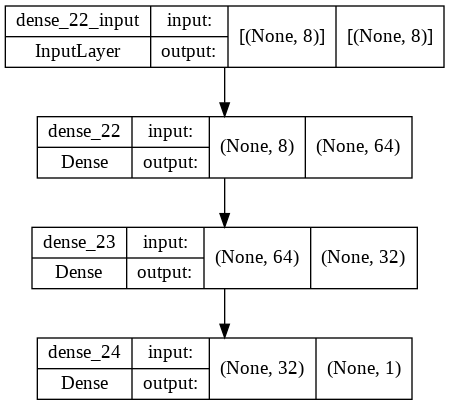

In [136]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [137]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.18510155,  0.18088561,  0.02808579,  0.0900382 , -0.28250206,
          0.03934611, -0.10051426, -0.1285277 , -0.04578827, -0.1713165 ,
         -0.2283872 ,  0.02133249,  0.05159956, -0.09464976,  0.14487933,
          0.01009852,  0.08283561, -0.297833  ,  0.00602014,  0.22649561,
         -0.23250231, -0.02831554, -0.19341014,  0.20914008,  0.1959435 ,
         -0.03618182, -0.17734013,  0.15988812, -0.08381952, -0.0007652 ,
          0.06801942, -0.21846668, -0.07327043,  0.04606108, -0.04066028,
         -0.01514028,  0.08942196,  0.0279886 , -0.08683917, -0.01590539,
         -0.14466614, -0.00555535, -0.00819442,  0.11633131,  0.24241848,
          0.21037832, -0.09435882,  0.14475355,  0.1260857 ,  0.08552902,
         -0.12916952,  0.0053458 ,  0.20947194, -0.34324014, -0.16153091,
         -0.26111475, -0.06799693,  0.08752037,  0.08537177,  0.16367327,
         -0.04442859,  0.14003201,  0.0017194 , -0.01868025],
        [-0.01745117,  0.1476958 ,  0.1232214 ,  0

In [138]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.185102,0.180886,0.028086,0.090038,-0.282502,0.039346,-0.100514,-0.128528,-0.045788,-0.171317,...,-0.161531,-0.261115,-0.067997,0.087520,0.085372,0.163673,-0.044429,0.140032,0.001719,-0.018680
1,-0.017451,0.147696,0.123221,0.011280,0.007783,0.001714,0.075454,-0.025968,0.161715,0.002374,...,0.088339,-0.061859,0.232888,-0.013399,0.057407,0.235640,0.088402,-0.009109,0.023185,-0.178632
2,-0.081082,0.093013,-0.148848,0.264773,0.083302,0.191935,-0.024990,0.102671,0.035419,-0.132367,...,-0.031994,-0.129311,0.046478,0.237733,0.167906,-0.051656,0.261219,0.087340,-0.081368,-0.288445
3,-0.195676,-0.120565,0.154790,-0.132809,-0.198842,0.099616,0.120409,-0.240063,0.112011,0.113943,...,-0.101797,0.258864,-0.152067,0.082825,0.210078,0.259942,0.064630,-0.001668,-0.182595,0.248170
4,-0.157604,-0.256459,0.139326,0.081911,-0.061559,-0.119837,-0.201201,0.206340,-0.226071,0.043407,...,-0.245255,-0.101970,0.241429,-0.010312,0.135535,0.100490,-0.146477,-0.186813,-0.132726,0.018443
5,0.265155,0.043513,0.012414,-0.131288,-0.173867,-0.180527,0.238700,0.169446,0.244460,-0.240997,...,0.176236,-0.209485,-0.091539,0.090368,-0.117189,-0.134731,0.010207,0.032501,0.126064,0.153695
6,0.224960,-0.019715,-0.148504,0.098523,0.051306,0.174450,0.054575,-0.147431,-0.155687,0.183893,...,0.134736,-0.222818,-0.250714,-0.137163,0.054465,0.231962,0.014155,0.113229,0.246431,0.238329
7,-0.151778,-0.228720,-0.051707,-0.132581,0.085308,-0.114349,-0.141357,0.017350,0.017592,-0.230776,...,-0.128176,0.163589,-0.054859,-0.095702,0.274549,-0.279359,-0.054029,0.155993,0.031082,0.243039


In [139]:
pd.DataFrame(model.get_weights()[1])

,0
0,-0.024267
1,-0.091057
2,-0.114910
3,-0.100406
4,0.067904
...,...
59,-0.065141
60,-0.047605
61,0.013387
62,-0.107687


In [140]:
pd.DataFrame(model.get_weights()[2])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.004137,-0.000194,-0.277208,-0.227039,0.077584,-0.256932,-0.056542,0.013188,0.011084,0.125400,...,-0.118745,0.142468,-0.115605,0.147298,0.219378,-0.171056,-0.187505,0.094622,-0.204432,-0.252755
1,-0.250292,-0.095626,-0.207304,0.144058,0.000912,0.129255,-0.107643,0.101851,0.206881,-0.246353,...,-0.190142,-0.192978,0.182596,0.079208,-0.113830,0.129751,-0.127958,-0.192967,-0.122874,0.066943
2,0.260374,-0.050259,-0.021054,-0.169983,-0.052965,0.051675,0.014240,0.038328,0.166348,0.026209,...,-0.069984,-0.092763,0.016053,0.194994,0.157599,0.199073,-0.117773,0.048569,0.228395,0.035309
3,0.118583,-0.066548,-0.100405,-0.070141,-0.131519,-0.160497,0.199977,-0.040383,-0.077702,0.190955,...,-0.112828,-0.281642,-0.053920,0.215365,-0.019162,0.083870,0.043296,0.215311,0.168434,0.021162
4,-0.047614,-0.088476,0.084005,0.122060,0.176898,-0.030503,-0.150182,0.187963,-0.121918,-0.254884,...,0.044788,-0.104253,-0.190055,-0.183753,-0.087793,0.066301,-0.113936,0.099122,0.158583,0.145034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.147141,0.059528,-0.256153,-0.066894,-0.142544,0.070579,0.220424,-0.120702,-0.021553,0.277870,...,-0.157906,0.121784,0.209064,0.098833,0.001821,0.002580,0.139446,0.114302,0.152555,-0.262763
60,0.024317,-0.128215,0.029540,0.205113,0.219811,-0.065535,0.003002,0.002563,0.059197,0.083390,...,0.111180,0.076820,-0.035962,0.177221,0.081296,-0.090236,-0.298190,-0.101683,-0.058915,0.038444
61,-0.103653,-0.099654,-0.163035,0.011358,0.104109,-0.141357,-0.142234,-0.149791,-0.029969,0.150074,...,-0.099088,0.081217,-0.209836,-0.147130,0.100022,-0.247049,0.028601,0.111107,-0.208195,-0.028784
62,0.268818,-0.207517,0.127910,-0.060996,-0.148624,-0.049321,0.120650,0.241520,-0.039105,0.143715,...,-0.191268,0.014117,0.148672,-0.084968,0.073280,-0.267507,-0.313541,0.081628,0.136540,-0.104861


In [141]:
pd.DataFrame(model.get_weights()[3])

,0
0,-0.149987
1,0.103109
2,-0.090325
3,-0.065308
4,0.084721
5,-0.080550
6,-0.074788
7,0.054038
8,0.050246
9,-0.090500


In [142]:
pd.DataFrame(model.get_weights()[4])

,0
0,-0.057198
1,0.177050
2,-0.135333
3,-0.008002
4,0.290904
5,0.007749
6,-0.321803
7,0.026253
8,0.036071
9,-0.157579


In [143]:
pd.DataFrame(model.get_weights()[5])

,0
0,0.100507


In [144]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [145]:
reg_history.history

{'loss': [0.2737579047679901,
  0.1081933006644249,
  0.05303364619612694,
  0.028785210102796555,
  0.02361355721950531,
  0.01376413181424141,
  0.010687283240258694,
  0.007851585745811462,
  0.006440143100917339,
  0.005830548238009214,
  0.005206690169870853,
  0.004873654805123806,
  0.00471882987767458,
  0.004096509888768196,
  0.004089883994311094,
  0.0037469067610800266,
  0.003902334487065673,
  0.003217949764803052,
  0.0031713831704109907,
  0.003143084468320012,
  0.0030161216855049133,
  0.002935966942459345,
  0.002593270968645811,
  0.0026459102518856525,
  0.002542465226724744,
  0.002440165262669325,
  0.0035605235025286674,
  0.003814079100266099,
  0.0032665301114320755,
  0.002866302616894245,
  0.002596186241135001,
  0.002518442226573825,
  0.0023668522480875254,
  0.0025479160249233246,
  0.0030272449366748333,
  0.0028562736697494984,
  0.0030240921769291162,
  0.0024029051419347525,
  0.002009026473388076,
  0.0019126231782138348,
  0.0019244898576289415,
  

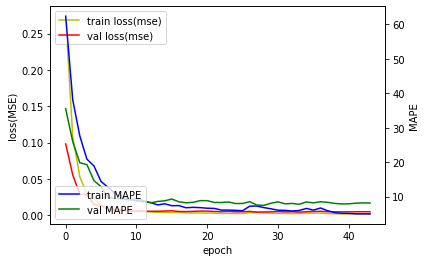

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

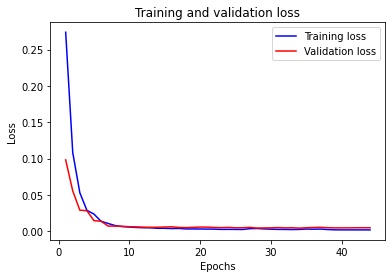

In [147]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

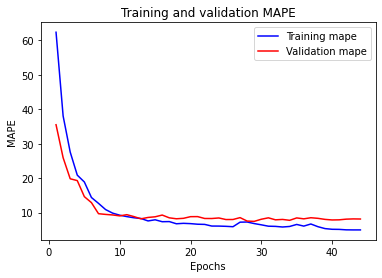

In [148]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [149]:
# 예측
y_pred = model.predict(test_features)

In [150]:
y_pred

array([[0.84151477],
       [0.6382032 ],
       [0.6523538 ],
       [0.937973  ],
       [0.8199015 ],
       [0.62680525],
       [0.6824199 ],
       [0.5437348 ],
       [0.93689656],
       [0.47465077],
       [0.6545617 ],
       [0.75342363],
       [0.6826658 ],
       [0.5343579 ],
       [0.66335857],
       [0.7190855 ],
       [0.5590028 ],
       [0.48428142],
       [0.77455026],
       [0.6320971 ],
       [0.6758027 ],
       [0.70001155],
       [0.9366399 ],
       [0.48927101],
       [0.63115704],
       [0.52786386],
       [0.9216169 ],
       [0.67885286],
       [0.90054566],
       [0.70420164],
       [0.8393001 ],
       [0.80776376],
       [0.64092076],
       [0.9213345 ],
       [0.6750922 ],
       [0.7375881 ],
       [0.8664404 ],
       [0.78575927],
       [0.8729295 ],
       [0.89124876],
       [0.86146426],
       [0.62034154],
       [0.6250618 ],
       [0.5959177 ],
       [0.5757326 ],
       [0.50521433],
       [0.6520894 ],
       [0.784

In [151]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.739
test MSE: 0.004
tset MAPE: 0.080


### RQ3

#### h) Model 1

In [ ]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)


# Loss Function
model.compile(optimizer=sgd, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min", restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode="min", min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=50, validation_split=0.2, callbacks=[es,lr])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [ ]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

In [ ]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

In [ ]:
pd.DataFrame(model.get_weights()[1])

In [ ]:
pd.DataFrame(model.get_weights()[2])

In [ ]:
pd.DataFrame(model.get_weights()[3])

In [ ]:
pd.DataFrame(model.get_weights()[4])

In [ ]:
pd.DataFrame(model.get_weights()[5])

In [ ]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

In [ ]:
reg_history.history

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [ ]:
# 예측
y_pred = model.predict(test_features)

In [ ]:
y_pred

In [ ]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

#### i) Model 2

In [ ]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Loss Function
model.compile(optimizer=RMSprop, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [ ]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

In [ ]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

In [ ]:
pd.DataFrame(model.get_weights()[1])

In [ ]:
pd.DataFrame(model.get_weights()[2])

In [ ]:
pd.DataFrame(model.get_weights()[3])

In [ ]:
pd.DataFrame(model.get_weights()[4])

In [ ]:
pd.DataFrame(model.get_weights()[5])

In [ ]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

In [ ]:
reg_history.history

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [ ]:
# 예측
y_pred = model.predict(test_features)

In [ ]:
y_pred

In [ ]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

#### j) Model 3

In [ ]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adagrad, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [ ]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

In [ ]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

In [ ]:
pd.DataFrame(model.get_weights()[1])

In [ ]:
pd.DataFrame(model.get_weights()[2])

In [ ]:
pd.DataFrame(model.get_weights()[3])

In [ ]:
pd.DataFrame(model.get_weights()[4])

In [ ]:
pd.DataFrame(model.get_weights()[5])

In [ ]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

In [ ]:
reg_history.history

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [ ]:
# 예측
y_pred = model.predict(test_features)

In [ ]:
y_pred

In [ ]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

### learning rate, callbacks

#### k) Model 1 (learning_rate = 0.01)

In [ ]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)


# Loss Function
model.compile(optimizer=sgd, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min", restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode="min", min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=50, validation_split=0.2, callbacks=[es,lr])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [ ]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

In [ ]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

In [ ]:
pd.DataFrame(model.get_weights()[1])

In [ ]:
pd.DataFrame(model.get_weights()[2])

In [ ]:
pd.DataFrame(model.get_weights()[3])

In [ ]:
pd.DataFrame(model.get_weights()[4])

In [ ]:
pd.DataFrame(model.get_weights()[5])

In [ ]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

In [ ]:
reg_history.history

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [ ]:
# 예측
y_pred = model.predict(test_features)

In [ ]:
y_pred

In [ ]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

#### l) Model 2 (learning_rate = 0.1)

In [ ]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.1)

# Loss Function
model.compile(optimizer=RMSprop, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [ ]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

In [ ]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

In [ ]:
pd.DataFrame(model.get_weights()[1])

In [ ]:
pd.DataFrame(model.get_weights()[2])

In [ ]:
pd.DataFrame(model.get_weights()[3])

In [ ]:
pd.DataFrame(model.get_weights()[4])

In [ ]:
pd.DataFrame(model.get_weights()[5])

In [ ]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

In [ ]:
reg_history.history

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [ ]:
# 예측
y_pred = model.predict(test_features)

In [ ]:
y_pred

In [ ]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

#### m) Model 3 (learning_rate = 1)

In [ ]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adagrad = tf.keras.optimizers.Adagrad(learning_rate=1)

# Loss Function
model.compile(optimizer=adagrad, loss='mse', metrics=['mape'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=200, batch_size=50, validation_split=0.2, callbacks=[es,lr])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

In [ ]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

In [ ]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

In [ ]:
pd.DataFrame(model.get_weights()[1])

In [ ]:
pd.DataFrame(model.get_weights()[2])

In [ ]:
pd.DataFrame(model.get_weights()[3])

In [ ]:
pd.DataFrame(model.get_weights()[4])

In [ ]:
pd.DataFrame(model.get_weights()[5])

In [ ]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

In [ ]:
reg_history.history

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [ ]:
# 예측
y_pred = model.predict(test_features)

In [ ]:
y_pred

In [ ]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

# SOM 

In [ ]:
ㅇ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('[컨디션난조 분위기고조] week5_KNN_데이터.csv')

In [ ]:
dataset

대학원 합격 확률이 0.7보다 큰지 유무에 따라 True, False로 분류

In [ ]:
dataset['target'] = (dataset['Chance of Admit '] > 0.7)
dataset

In [ ]:
dataset['target'].value_counts() 

In [ ]:
dataset.isnull().sum()

In [ ]:
y = dataset.iloc[:, -1]

In [ ]:
y

In [ ]:
X = dataset.iloc[:, 1:7]

In [ ]:
X

In [ ]:
xcols = X.columns

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1)) 
X = sc.fit_transform(X)

In [ ]:
!pip install minisom

In [ ]:
from minisom import MiniSom

Parameters :

- x and y = dimensions of the grid

- input_len = No of features in input dataset

- sigma = radius of the neighbourhoods

- learning_rate = By how much the weiights are updated in each iteration. Higher the value faster the algorithm runs.

In [ ]:
som = MiniSom(x=4 ,y=4 ,sigma=1.0 ,learning_rate=0.5 ,input_len=6)

In [ ]:
# Initializing the weights
som.random_weights_init(X) # random_weights_init 으로 각 node 들을 초기화

In [ ]:
som.train_random(data=X ,num_iteration=100) # train_random 메서드로 SOM 학습을 시작

In [ ]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

show()

In [ ]:
# 5*5 map 을 평면 위에 표현
# node 에 최근접한 data point 들이 많을수록 짙게, 적을수록 옅게 표시 (Map 의 진한 부분엔 데이터들이 모여있다는 뜻)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

plt.figure(figsize=(17, 10), dpi= 80, facecolor='w', edgecolor='k') # To make the fig bigger 

pcolor(som.distance_map().T)
# This line finds out the mean inter neuron distance and makes a map based on these distances.
# It makes clusters based on the colours based on the distances. The darker the colour the closer the neurons is to it's neighbourhood.
# The lighter neurons are the outliers and if customers are present in it that means they are fradulent.
colorbar() # This is the legend of the map

In [ ]:
som.distance_map() 

In [ ]:
mapping = som.win_map(X)

In [ ]:
type(mapping)

In [ ]:
np.array(mapping[0,0]) # competitive map에서 특정 좌표에 존재하는 관측치들이 각각 가지는 feature의 값

In [ ]:
np.array(mapping[0,0]).shape # competitive map이 4x4이므로, mapping[i,j]에서 i와 j는 0~2까지의 숫자를 넣을 수 있음
# (해당 좌표에 포함된 sample 수, feature 개수)

In [ ]:
pd.DataFrame(mapping[0,0])

In [ ]:
for i in range(0,4):
    for j in range(0,4):
        print("(", i+1, ",", j+1, ")", "allocated obseravations:", np.array(mapping[i,j]).shape[0])

In [ ]:
sum_mapping = 0
for i in range(0,4):
    for j in range(0,4):
        sum_mapping = sum_mapping + np.array(mapping[i,j]).shape[0]
print("# of observations=", sum_mapping)

In [ ]:
400/16

In [ ]:
mean_list = []
std_list = []
median_list = []
index_list = []
for i in range(0, 4):
    for j in range(0, 4):
        mean_list.append(pd.DataFrame(mapping[i,j]).describe().loc['mean'])
        std_list.append(pd.DataFrame(mapping[i,j]).describe().loc['std'])
        median_list.append(pd.DataFrame(mapping[i,j]).describe().loc['50%'])
        index_list.append('(' + str(i+1) + ',' + str(j+1) + ')' )

In [ ]:
temp = pd.DataFrame(mean_list, index =index_list) # competitive map에서 각 좌표별 feature의 평균값
temp.columns = xcols
temp

In [ ]:
temp = pd.DataFrame(median_list, index =index_list) # competitive map에서 각 좌표별 feature의 중앙값
temp.columns = xcols
temp

In [ ]:
temp = pd.DataFrame(std_list, index =index_list) # competitive map에서 각 좌표별 feature의 표준편차
temp.columns = xcols
temp

y(target)값과 함께 시각화

In [ ]:
# y값도 표현 (카드발급 승인 여부: y=0 -> 빨간 동그라미 o, y=1 -> 초록 네모 square)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
y

In [ ]:
markers[y[1]]

참고 (ANN):

https://onesixx.com/optimizer-loss-metrics/

https://keras.io/ko/metrics/

https://talkingaboutme.tistory.com/entry/DL-%ED%95%B4%EB%B3%B4%EB%A9%B4%EC%84%9C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-ANN-%EA%B5%AC%ED%98%84-3

https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/

https://han-py.tistory.com/207

https://jackyoon5737.tistory.com/32

https://gomguard.tistory.com/187

https://blog.naver.com/qbxlvnf11/221449297033

https://wikidocs.net/32105

http://blog.naver.com/shwotjd14/221458224334

https://bioinformaticsandme.tistory.com/241

https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-4-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EB%B6%84%EB%A5%98-%EC%9D%B4%EC%A7%84-%EB%B6%84%EB%A5%98-%EC%98%88%EC%A0%9C/

https://codetorial.net/tensorflow/get_output_of_neuron_layers.html

https://codetorial.net/tensorflow/visualize_model.html

https://codetorial.net/tensorflow/visualize_training_history.html




https://wikidocs.net/44766

https://gooopy.tistory.com/80

https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

https://ssongnote.tistory.com/10

- RBF
https://www.python2.net/questions-379561.htm

참고 (SOM):

https://pypi.org/project/sklearn-som/

https://github.com/rileypsmith/sklearn-som/blob/main/example/example.py

https://sklearn-som.readthedocs.io/en/latest/





https://www.infoking.site/37

http://jaynewho.com/post/7

https://blog.naver.com/slykid/221970736285

https://lovit.github.io/visualization/2019/12/02/som_part1/





https://github.com/samarthjsh300/Self-Organizing-Maps



https://www.kaggle.com/pranayprasad/credit-card-fraud-detection

https://www.kaggle.com/monntosky/self-organising-maps

https://rubikscode.net/2018/09/24/credit-card-fraud-detection-using-self-organizing-maps-and-python/

https://colab.research.google.com/github/taruma/hidrokit-nb/blob/master/notebook/taruma_udemy_som_megacasestudy.ipynb




https://github.com/JustGlowing/minisom



https://github.com/Kursula/Kohonen_SOM